In [1]:
from brainnet.config import get_cfg_defaults

cfg = get_cfg_defaults()

# manually download and unzip subj01.zip from algonauts2023 challenge
# https://docs.google.com/forms/d/e/1FAIpQLSehZkqZOUNk18uTjRTuLj7UYmRGz-OkdsU25AyO3Wm6iAb0VA/viewform
cfg.DATASET.DATA_DIR = "/home/admin/Algonaut/data/algonauts2023/subj02"
cfg.DATASET.BATCH_SIZE = 10

In [2]:
import torch
import torch.nn as nn
import gc

#del trainer
#del plmodel

torch.cuda.empty_cache()
gc.collect()

0.0
0.0
0.0
0.0


/home/admin2/.local/lib/python3.9/site-packages/torch/cuda/memory.py:416: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [3]:
import torch
from torch import nn
import numpy as np
from einops import rearrange




In [4]:
def extract_backbone(ckpt):
    state = {}
    for k in ckpt.keys():
        if 'backbone' in k:
            new_k = k.split('backbone.')[1]
            state[new_k] = ckpt[k]
    return state

In [5]:
ckpt_f = '/home/admin2/Algonaut/dat_backbones/cmrcn_dat_b_3x.pth'
ckpt = torch.load(ckpt_f)['state_dict']
state = extract_backbone(ckpt)
torch.save(state, '/home/admin2/Algonaut/dat_backbones/bkbn_cmrcn_dat_b_3x.pth')

In [6]:
torch.load('/home/admin2/Algonaut/dat_backbones/bkbn_cmrcn_dat_b_3x.pth')

{'patch_proj.0.weight': tensor([[[[ 0.0271, -0.0115,  0.0139],
           [-0.0341, -0.0913, -0.0653],
           [ 0.0084,  0.0889,  0.0608]],
 
          [[ 0.0202, -0.0307,  0.0011],
           [-0.0498, -0.1255, -0.0913],
           [ 0.0346,  0.1349,  0.0971]],
 
          [[ 0.0251, -0.0039,  0.0158],
           [-0.0173, -0.0600, -0.0463],
           [-0.0053,  0.0525,  0.0327]]],
 
 
         [[[-0.0143, -0.0261,  0.0131],
           [-0.0245,  0.1020, -0.0711],
           [ 0.0198, -0.0657,  0.0256]],
 
          [[-0.0053, -0.0142,  0.0248],
           [-0.0263,  0.1705, -0.0850],
           [ 0.0134, -0.0986,  0.0260]],
 
          [[-0.0003, -0.0257,  0.0125],
           [-0.0170,  0.0591, -0.0518],
           [ 0.0139, -0.0472,  0.0375]]],
 
 
         [[[-0.1806, -0.0296,  0.0331],
           [-0.1263,  0.0657,  0.0854],
           [ 0.0135,  0.0877,  0.0857]],
 
          [[-0.0615, -0.0040, -0.0018],
           [-0.0026,  0.0556,  0.0036],
           [ 0.0455, -0.0185, 

In [ ]:
extract_backbone(ckpt)

backbone.patch_proj.0.weight patch_proj.0.weight
backbone.patch_proj.0.bias patch_proj.0.bias
backbone.patch_proj.1.norm.weight patch_proj.1.norm.weight
backbone.patch_proj.1.norm.bias patch_proj.1.norm.bias
backbone.patch_proj.3.weight patch_proj.3.weight
backbone.patch_proj.3.bias patch_proj.3.bias
backbone.patch_proj.4.norm.weight patch_proj.4.norm.weight
backbone.patch_proj.4.norm.bias patch_proj.4.norm.bias
backbone.stages.0.layer_norms.0.norm.weight stages.0.layer_norms.0.norm.weight
backbone.stages.0.layer_norms.0.norm.bias stages.0.layer_norms.0.norm.bias
backbone.stages.0.layer_norms.1.norm.weight stages.0.layer_norms.1.norm.weight
backbone.stages.0.layer_norms.1.norm.bias stages.0.layer_norms.1.norm.bias
backbone.stages.0.layer_norms.2.norm.weight stages.0.layer_norms.2.norm.weight
backbone.stages.0.layer_norms.2.norm.bias stages.0.layer_norms.2.norm.bias
backbone.stages.0.layer_norms.3.norm.weight stages.0.layer_norms.3.norm.weight
backbone.stages.0.layer_norms.3.norm.bias s

In [8]:
torch.__version__

'2.0.0+cu117'

In [4]:
import torch
from dat_models.dat import DAT
backbone = DAT()
backbone.load_state_dict(torch.load('/home/admin2/Algonaut/dat_backbones/bkbn_upn_dat_b_160k.pth'))
#backbone.load_state_dict(torch.load('/home/admin2/Algonaut/dat_backbones/bkbn_cmrcn_dat_b_3x.pth'))
cfg.MODEL.LAYERS = list(range(4))
cfg.MODEL.LAYER_WIDTHS = [128, 256, 512, 1024]#, 2048]
cfg.MODEL.BOTTLENECK_DIM = 128  # can be reduced to speed up

/home/admin2/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from brainnet.plmodel import PLModel
import pytorch_lightning as pl


plmodel = PLModel(
    cfg, 
    backbone, 
    draw=False,  # draw on each epoch end
    cached=False,  # cache the features into cpu memory in first epoch
)
# plmodel.validation_epoch_end() is called on validation epoch to draw
plmodel = plmodel.cuda()

/home/admin2/Algonaut/data/algonauts2023/subj02/training_split/training_images /home/admin2/Algonaut/data/algonauts2023/subj02/training_split/training_fmri


/usr/local/lib/python3.9/dist-packages/cortex/utils.py:1023: UserWarning: fsaverage is already present in the database. Set download_again to True if you wish to download the subject again.
  warnings.warn(


In [6]:
cfg.DATASET.BATCH_SIZE

10

In [7]:
from pytorch_lightning.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
        # dirpath=checkpoints_path, # <--- specify this on the trainer itself for version control
        filename="model_{epoch:02d}",
        every_n_train_steps=500,
        save_top_k=-1,  # <--- this is important!
    )

In [ ]:
plmodel.load_state_dict(torch.load('lightning_logs/version_34/checkpoints/model_epoch=00-v14.ckpt')['state_dict'])

<All keys matched successfully>

In [8]:
trainer = pl.Trainer(
    max_epochs=10,
    accelerator="gpu",
    devices=[0],
    gradient_clip_val=0.5,
    #precision=16,  # set to 32 if you use GPU before 2080
    limit_train_batches=1.0,
    limit_val_batches=1.0,
    enable_checkpointing=True,
    callbacks=[checkpoint_callback],
    #resume_from_checkpoint = 'lightning_logs/version_34/checkpoints/model_epoch=00-v14.ckpt'
)
trainer.fit(plmodel)
# 30 min on 4090, 8GB of VRAM

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | backbone | DAT        | 92.7 M
1 | model    | FactorTopy | 5.7 M 
2 | train_r2 | R2Score    | 0     
3 | val_r2   | R2Score    | 0     
----------------------------------------
98.4 M    Trainable params
118 K     Non-trainable params
98.5 M    Total params
394.015   Total estimated model params size (MB)


Epoch 0:  12%|█▏        | 119/985 [22:43<2:45:22, 11.46s/it, loss=0.415, v_num=21]

colab natten:   !pip3 install natten -f https://shi-labs.com/natten/wheels/cu117/torch2.0.0/index.html --quiet 
!pip install openmim
!mim install mmdet


In [ ]:
plmodel.dataset.data_dir

'/home/admin2/Algonaut/data/algonauts2023/subj02'

/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent


Generating a flatmap cache


/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent
/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent
/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent
/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent
/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent
/home/admin2/Algonaut/BrainDecodesDeepNets/brainnet/plot_utils.py:353: RuntimeWarning: inv

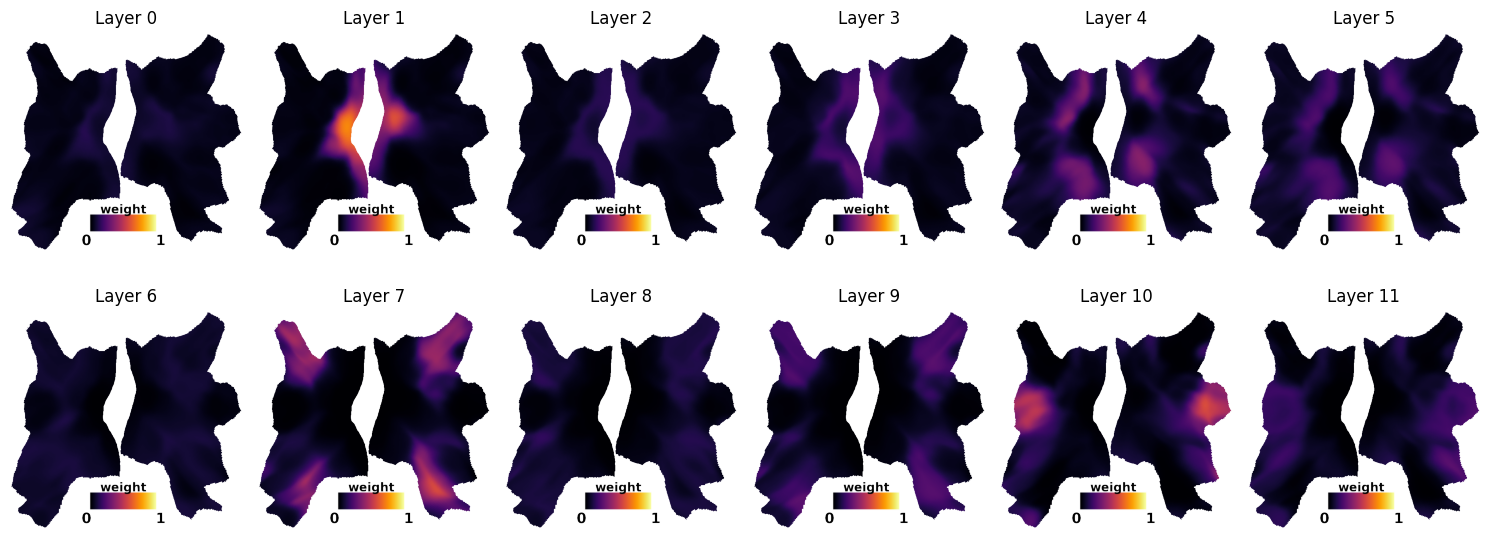

In [ ]:
# plot raw layer selector weights
import matplotlib.pyplot as plt

sel_space, sel_layer, sel_scale = plmodel.get_selectors()
sel_layer = sel_layer.detach().cpu().numpy()
from brainnet.plot_utils import make_single_ls_weight_plot

for i in range(12):
    png = f"/tmp/ls_weight_{i}.png"
    make_single_ls_weight_plot(sel_layer[:, i], png)
fig, axs = plt.subplots(2, 6, figsize=(15, 6))
for i in range(12):
    ax = axs.flatten()[i]
    ax.set_title(f"Layer {i}")
    png = f"/tmp/ls_weight_{i}.png"
    ax.imshow(plt.imread(png))
    ax.axis("off")
fig.tight_layout()
plt.show()
plt.close()

/workspace/brainnet/plot_utils.py:353: RuntimeWarning: invalid value encountered in divide
  fsaverage /= 0  # nan to make other vertices transparent


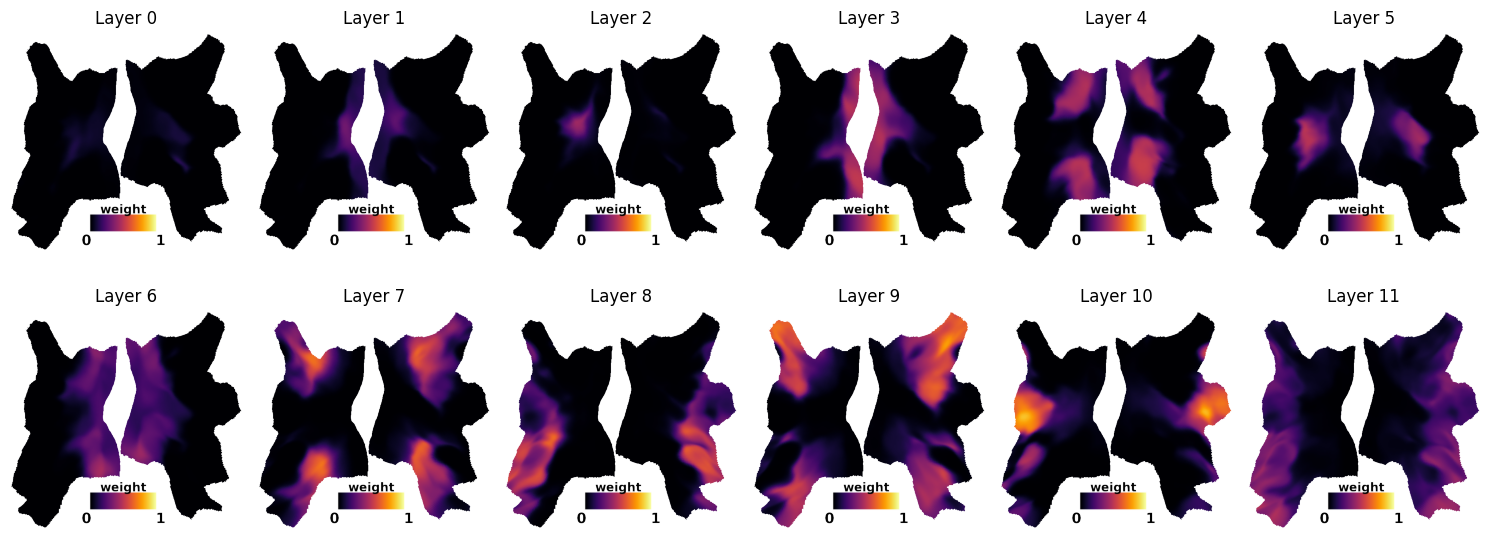

In [ ]:
# plot raw layer selector weights
import matplotlib.pyplot as plt

sel_space, sel_layer, sel_scale = plmodel.get_selectors()
sel_layer = sel_layer.detach().cpu().numpy()
from brainnet.plot_utils import make_single_ls_weight_plot

for i in range(12):
    png = f"/tmp/ls_weight_{i}.png"
    make_single_ls_weight_plot(sel_layer[:, i], png)
fig, axs = plt.subplots(2, 6, figsize=(15, 6))
for i in range(12):
    ax = axs.flatten()[i]
    ax.set_title(f"Layer {i}")
    png = f"/tmp/ls_weight_{i}.png"
    ax.imshow(plt.imread(png))
    ax.axis("off")
fig.tight_layout()
plt.show()
plt.close()

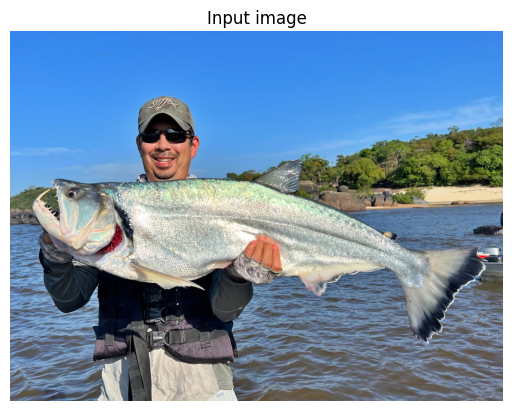

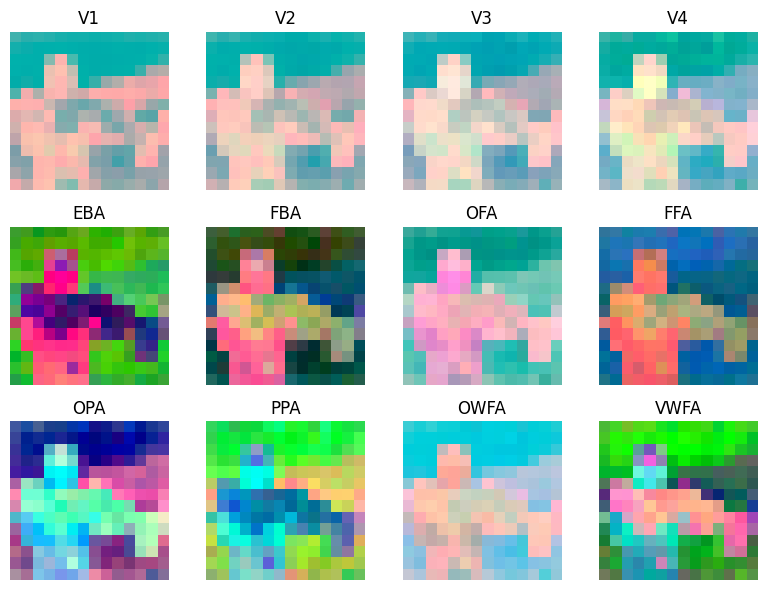

In [ ]:
## plot top channels

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

image_path = "/home/admin2/Algonaut/BrainDecodesDeepNets/assets/catchafish.jpg"
plt.imshow(Image.open(image_path))
plt.axis("off")
plt.title("Input image")
plt.show()
plt.close()

image = Image.open(image_path).convert("RGB")
transforms = transforms.Compose(
    [
        transforms.Resize(cfg.DATASET.RESOLUTION),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
image = transforms(image).unsqueeze(0).cuda()

top_channels = plmodel.draw_top_channels(image)

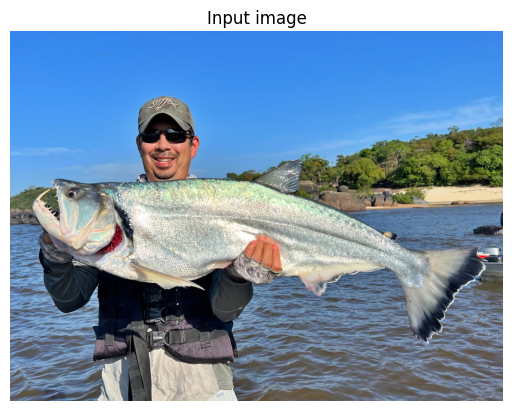

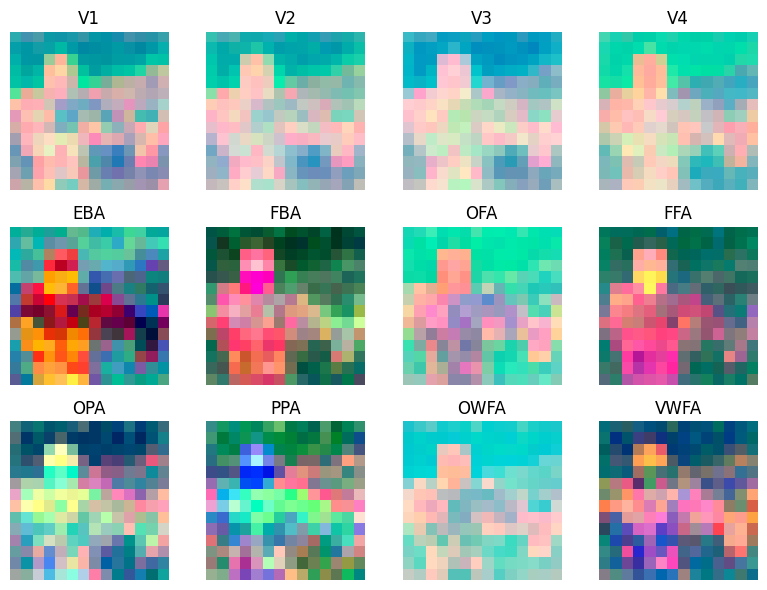

In [ ]:
## plot top channels

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

image_path = "/workspace/assets/catchafish.jpg"
plt.imshow(Image.open(image_path))
plt.axis("off")
plt.title("Input image")
plt.show()
plt.close()

image = Image.open(image_path).convert("RGB")
transforms = transforms.Compose(
    [
        transforms.Resize(cfg.DATASET.RESOLUTION),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
image = transforms(image).unsqueeze(0).cuda()

top_channels = plmodel.draw_top_channels(image)